<a href="https://colab.research.google.com/github/Foyceek/MLF_2026_HECL_Frantisek/blob/main/MPA_MLF_SVM_2students_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [13]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [14]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [18]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [21]:
import numpy as np

x,y = iris.data[:,:2], iris.target

x,y = x[y<2], y[y<2]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

print("Default model accuracy:", svm_model.score(x_test, y_test))

svm_model_C200 = SVC(kernel='linear', C=200)
svm_model_C200.fit(x_train, y_train)

print("C200 model accuracy:", svm_model.score(x_test, y_test))

Default model accuracy: 1.0
C200 model accuracy: 1.0


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

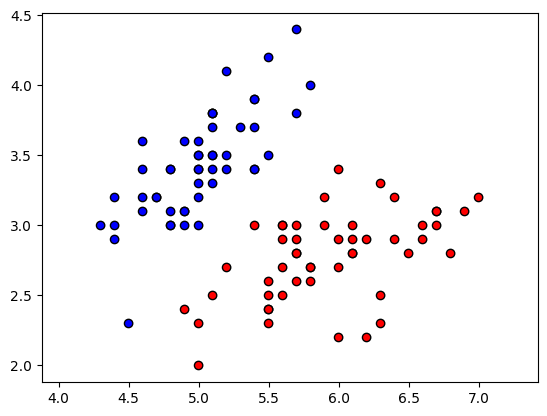

In [22]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y, cmap = 'bwr', edgecolors = 'k')
plt.axis('equal')
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

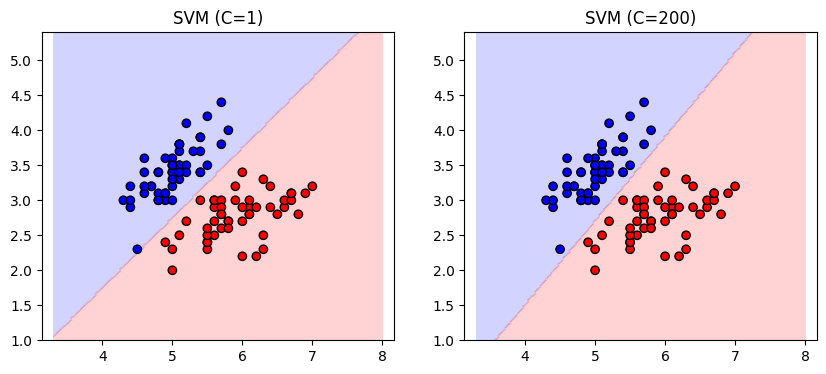

In [23]:
def plot_decision_boundary(model, x, y):
    xx, yy = np.meshgrid(
        np.linspace(x[:,0].min()-1, x[:,0].max()+1, 200),
        np.linspace(x[:,1].min()-1, x[:,1].max()+1, 200)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
    plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr', edgecolors='k')
    plt.axis('equal')

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plot_decision_boundary(svm_model, x, y)
plt.title("SVM (C=1)")

plt.subplot(1,2,2)
plot_decision_boundary(svm_model_C200, x, y)
plt.title("SVM (C=200)")

plt.show()


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

(100,)


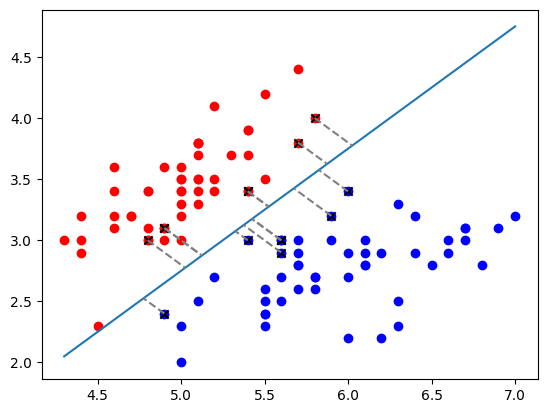

In [27]:
X=iris.data[iris.target != 2, 0:2]
#print(X.shape)
y=iris.target[iris.target != 2]
print(y.shape)
SVMmodel_2 = SVC(kernel='linear') #support model classifier

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,test_size=0.2)
SVMmodel_2.fit(X_train_2, y_train_2)
SVMmodel_2.get_params()
SVMmodel_2.score(X_test_2,y_test_2)

def closest_point_on_line(x, y, W, b):
    """
    Compute the closest point on the decision boundary (line) for a given point (x, y).
    """
    A, B = W[0, 0], W[0, 1]  # Line coefficients
    C = b  # Bias term

    # Compute closest point using the perpendicular distance formula
    x_closest = (B * (B * x - A * y) - A * C) / (A**2 + B**2)
    y_closest = (A * (-B * x + A * y) - B * C) / (A**2 + B**2)

    return np.array([x_closest, y_closest]).flatten()  # Ensures shape (2,)

from sklearn.datasets import make_blobs
import numpy as np
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')

supvectors = SVMmodel_2.support_vectors_

#Separating line coefficients:
W=SVMmodel_2.coef_
b=SVMmodel_2.intercept_

x0 = np.linspace(np.min(X[:,0]), np.max(X[:,0]),2)
x1 = (-b-W[0,0]*x0)/(W[0,1])
plt.plot(x0, x1)

# Plot the support vectors here
#print(supvectors)
for i in range(supvectors.shape[0]):
  #plt.plot(supvectors[i,0], supvectors[i,1], color='green')
  plt.scatter(supvectors[i,0], supvectors[i,1], color='black', marker='x')

closest_points = np.array([closest_point_on_line(x, y, W, b) for x, y in supvectors])
#print(closest_points)


# Draw simple lines from support vectors to closest points
for sv, cp in zip(supvectors, closest_points):
    plt.plot([sv[0], cp[0]], [sv[1], cp[1]], 'gray', linestyle='dashed')  # Dashed lines



# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

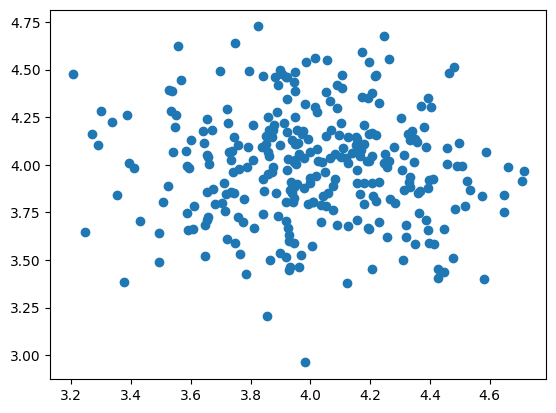

In [8]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

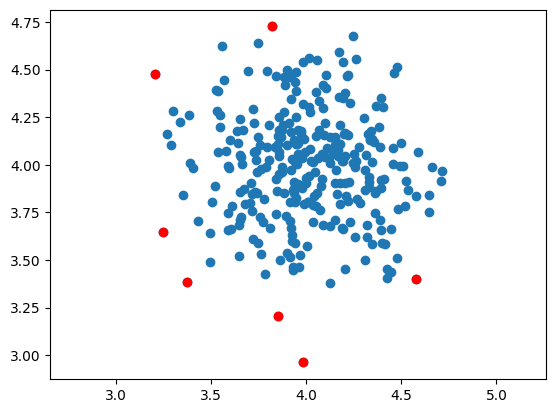

In [9]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


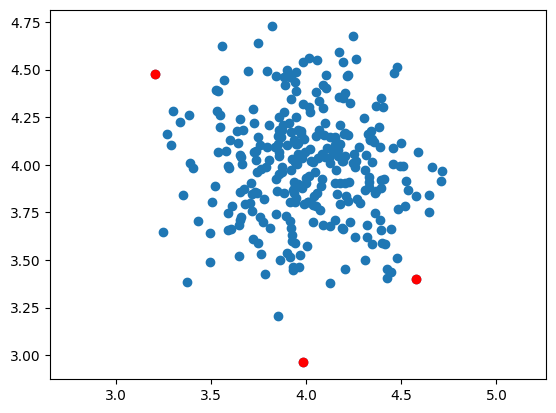

In [10]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()